In [1]:
# 컨볼루션(Convolution): 두 개의 함수 f, g가 있을 때 적분변수에 대하여 하나의 함수를 반전하고, 시간 t만큼 이동시킨 후에, 다른 하나의 함수와 곱한 결과를 전체 구간에서 적분하는 것을 의미함

# 위키백과: 합성곱, 하나의 함수와 또 다른 함수를 반전 이동한 값을 곱한 다음, 구간에 대해 적분하여 새로운 함수를 구하는 수학 연산자

# 왜 필요할까? 1) 입력과 출력이 있는 기본적인 시스템에서, 어떠한 출력값이 있는데, 이 값은 지금 현재에만 영향을 받는 것이 아니라 이전의 입력값들에도 영향을 받음, 따라서 이러한 이전의 값과 현재의 값의 연산을 하기 위해 컨볼루션 필요
# 2) 입력된 신호는 시스템의 전달함수와 컨볼루션되어 출력 신호 생성, 두 개의 다른 시스템이 연결되어 있을 경우 두 개의 시스템의 전달함수의 컨볼루션이 새로운 시스템의 전달함수가 됨... 음...

# 다른 내용: 떨어뜨린 공의 교훈.. 어떤 높이에서 땅에 공을 떨어뜨릴 때 이 공은 오직 한 차원에서만 움직인다고 가정, 공을 떨어뜨렸을 때 공이 떨어진 위치에서 다시 공을 집어서 한 번 더 떨어뜨릴 경우 공이 떨어진 거리를 c라고.. c에 도달할 확률은 몇?
# 공을 떨어뜨릴 때 시작 위치에서 떨어진 지점을 a, 확률분포를 f, a지점에 도달할 확률은 f(a)
# a지점에서 공을 주워 다시 떨어뜨릴 때 지점을 b, 확률분포를 g, b지점에 도달할 확률은 g(b)
# 만약에 첫 번째로 공을 떨어뜨렸을 때 결과를 고정값이라 본다면, 거리 a는 알 수 있음?... 최종적으로 간 거리 c도 고정값이라 본다면 a+b=c 이므로 b도 고정시킬 수 있음, 그러면 a지점, b지점에 도달할 확률이 고정, c에 도달할 확률을 f(a)·g(b)로 정리
# 그런데~ 최종거리 c에 도달할 수 있는 방법은 다양함. f(a)·g(b)이긴 한데, a와 b는 여러개... 따라서 c에 도달할 확률이 이 여러개들의 합으로 표현 가능
# 그래서! f*g(c) = ∑ f(a)·g(b) = ∑ f(a)·g(c-a)
# https://dkeemin.com/%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98convolution-%EC%A0%95%EC%9D%98%EB%A5%BC-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90/

# 다시 수업으로 돌아와서
# 컨볼루션은 데이터 관점에서 곱셈과 덧셈
# 곱셈: 데이터 관점에서 곱셈 연산은 원본 데이터 또는 입력 데이터에 변화를 주어 출력 데이터를 만들어 내는 역할을 수행, 원본 데이터 f(x)에 변화를 주기 위해 g(x-t)를 곱해준다..
# 덧셈: 덧셈 연산은 데이터의 평균을 구한다는 의미를 내포하고 있음
# 컨볼루션: 원본 데이터 또는 입력 데이터에 변화를 주어서, 그 변화된 값들의 평균을 구한다는 의미를 내포
# g(x-t)는 시간 전이, time shift를 의미
# 데이터 관점에서 컨볼루션?
# 해석1: 시간의 흐름에 따라 데이터 g(x)가 이동하면서, 입력데이터 f(x)를 평균적으로 얼마나 변화시키는지 나타내는 것
# 해석2: 시간의 흐름에 따라 움직이는 데이터 g(x)에 의해서 입력데이터 f(x)가 평균적으로 얼마나 변하는지 나타내느 것

In [1]:
# CNN 아키텍처 비교(NN vs. CNN)
# 은닉층에 해당하는 부분이 여러 개의 컨볼루션층과 완전연결층으로 대체
# 컨볼루션층: conv / relu / pooling
# conv: 입력데이터와 가중치들의 집합체인 다양한 필터와의 컨볼루션 연산을 통해 입력데이터의 특징을 추출하는 역할을 수행
# 말은 어렵게 했지만 가중치들의 집합체를 특징(feature)이라고 하는 것 같음..
# pooling: 입력정보를 최대값, 최소값, 평균값 등으로 압축하여 데이터 연산량을 줄여주는 역할

# 패딩(padding): 컨볼루션 연산을 수행하기 전에 입력데이터 주변을 특정값(예를 들면 0)으로 채우는 것
# 컨볼루션 연산을 수행하면 데이터 크기가 줄어드는 단점, 이를 방지하기 위해 패딩 사용 

In [3]:
# CNN MNIST
# CNN 구조는 특징추출기 Feature Extractor와 분류기 Classifier가 합쳐져 있는 형태
# 특징추출기: 컨볼루션 레이어와 풀링 레이어 다양한 조합으로 구성, 이미지 데이터의 특징을 추출하고 압축
# 분류기: 완전연결층인 Dense 레이어와 과적합을 방지하기 위한 Dropout 레이어 등 다양한 조함, 정답을 분류하는 역할 수행

# MNIST 데이터 불러오기 및 정규화
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 텐서로 변환(높이, 너비, 채널 형태의 3차원): CNN에서는 반드시 이렇게 변환해줘야함..
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
# CNN 모델 구축
cnn = Sequential()

# 특징 추출기 Featur Extractor
cnn.add(Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32, activation = 'relu')) # 형태, 크기, 필터 반드시 입력해야함. 필터개수가 32개, 필터 초기화는 내부적으로 Xavier/He 방식으로 자동 초기화
cnn.add(Conv2D(kernel_size = (3, 3), filters = 64, activation = 'relu')) # 여기는 왜 필터 64개임?
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25)) # 과적합 방지

cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5)) # 과적합 방지
cnn.add(Dense(10, activation = 'softmax')) # 정답 노드와 동일한 10개로 정의

In [9]:
# 모델 컴파일 및 학습
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
469/469 [==============================] - 32s 67ms/step - loss: 0.4742 - accuracy: 0.8517 - val_loss: 0.0536 - val_accuracy: 0.9836
Epoch 2/30
469/469 [==============================] - 32s 68ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 3/30
469/469 [==============================] - 32s 68ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0349 - val_accuracy: 0.9872
Epoch 4/30
469/469 [==============================] - 31s 67ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 5/30
469/469 [==============================] - 31s 67ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 6/30
469/469 [==============================] - 31s 67ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 7/30
469/469 [==============================] - 31s 67ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0266 - val_accuracy:

In [13]:
# 모델 평가
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9932


[0.034954506903886795, 0.9932000041007996]

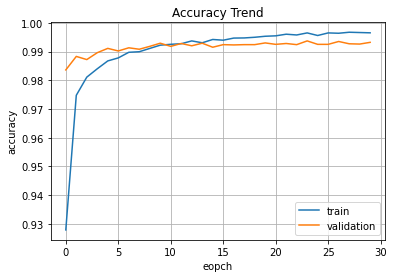

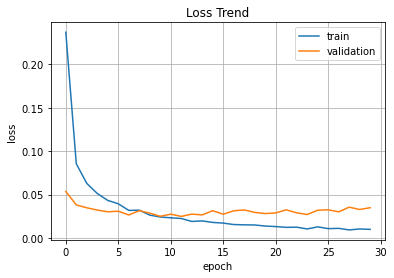

In [11]:
# 정확도 및 손실
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('eopch')
plt.legend(['train', 'validation'], loc = 'best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'best')
plt.grid()
plt.show()